In [58]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
tf1 = tf.compat.v1
print(tf.__version__)

2.6.0


In [68]:
file_path = 'dataset/weather.csv'
data=pd.read_csv(file_path, delimiter=',',header=11,skipinitialspace=True)
data.head(30)

,Year,Month,Day,Hour,Minute,Temperature,Total_Precipitation,Wind_Speed,Wind_Direction
0,2018,1,15,0,0,16.40,0.0,6.73,74.48
1,2018,1,15,1,0,16.27,0.0,6.62,67.62
2,2018,1,15,2,0,16.14,0.0,6.30,59.04
3,2018,1,15,3,0,16.04,0.0,6.30,59.04
4,2018,1,15,4,0,15.97,0.0,6.19,54.46
5,2018,1,15,5,0,15.90,0.0,5.90,52.43
6,2018,1,15,6,0,15.83,0.0,5.86,47.49
7,2018,1,15,7,0,15.85,0.0,5.60,45.00
8,2018,1,15,8,0,16.24,0.0,6.62,45.00
9,2018,1,15,9,0,16.69,0.0,6.37,47.29


In [70]:
temperature = np.array(data['Temperature'])
num_periods = 24
f_horizon = 1
x_data = temperature[:(len(temperature)-(num_periods*2))]
x_batches = x_data.reshape(-1, num_periods, 1)

print("=== x batches: ", x_batches)

y_data = temperature[1:(len(temperature)-(num_periods*2))+f_horizon]
y_batches = y_data.reshape(-1, num_periods, 1)
print(y_batches.shape)

=== x batched:  [[[16.4 ]
  [16.27]
  [16.14]
  [16.04]
  [15.97]
  [15.9 ]
  [15.83]
  [15.85]
  [16.24]
  [16.69]
  [17.22]
  [17.72]
  [18.25]
  [18.68]
  [19.08]
  [19.52]
  [19.75]
  [19.47]
  [18.91]
  [19.71]
  [19.5 ]
  [19.2 ]
  [18.89]
  [18.69]]

 [[18.46]
  [18.23]
  [18.05]
  [17.94]
  [17.8 ]
  [17.7 ]
  [17.59]
  [17.6 ]
  [17.94]
  [18.3 ]
  [18.72]
  [19.15]
  [19.46]
  [19.79]
  [19.88]
  [19.98]
  [19.93]
  [19.73]
  [19.3 ]
  [20.21]
  [19.91]
  [19.62]
  [19.39]
  [19.21]]

 [[19.04]
  [18.9 ]
  [18.73]
  [18.59]
  [18.48]
  [18.3 ]
  [18.24]
  [18.25]
  [18.63]
  [19.23]
  [19.96]
  [20.65]
  [21.26]
  [21.87]
  [22.16]
  [22.27]
  [22.14]
  [21.71]
  [20.98]
  [19.36]
  [19.09]
  [18.64]
  [18.16]
  [17.94]]

 [[17.75]
  [17.56]
  [17.33]
  [17.15]
  [17.02]
  [16.83]
  [16.71]
  [16.66]
  [17.17]
  [18.1 ]
  [19.49]
  [20.84]
  [22.91]
  [24.05]
  [24.71]
  [24.6 ]
  [24.22]
  [23.46]
  [21.76]
  [21.1 ]
  [19.97]
  [19.05]
  [18.35]
  [18.05]]

 [[17.8 ]
  [18.

In [61]:
def test_data(series, forecast, num):
    testX = temperature[-(num + forecast):][:num].reshape(-1, num_periods, 1)
    testY = temperature[-(num):].reshape(-1, num_periods, 1)
    return testX, testY
X_test, Y_test = test_data(temperature, f_horizon, 24*2)
print(X_test.shape)


(2, 24, 1)


In [62]:
tf1.reset_default_graph()
inputs = 1
rnn_size = 100
output = 1
learning_rate=0.001
dropout_keep_prob = tf1.placeholder(tf.float32)

X = tf1.placeholder(tf.float32, [None, num_periods, 1])
Y = tf1.placeholder(tf.float32, [None, num_periods, 1])

rnn_cells=tf1.nn.rnn_cell.BasicRNNCell(num_units=rnn_size, activation=tf.nn.relu)
rnn_output, states = tf1.nn.dynamic_rnn(rnn_cells, X, dtype=tf.float32)


output=tf.reshape(rnn_output, [-1, rnn_size])
logit=tf1.layers.dense(output, 1, name="softmax")

outputs=tf.reshape(logit, [-1, num_periods, 1])
print(logit)

loss = tf.reduce_sum(tf.square(outputs - Y))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logit, 1), tf.cast(Y, tf.int64)), tf.float32))

optimizer = tf1.train.AdamOptimizer(learning_rate=learning_rate)
train_step=optimizer.minimize(loss)

init=tf1.global_variables_initializer()

/Users/nguyenthanhphong/opt/anaconda3/lib/python3.8/site-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:415: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be "
/Users/nguyenthanhphong/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
/Users/nguyenthanhphong/opt/anaconda3/lib/python3.8/site-packages/keras/legacy_tf_layers/core.py:236: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/Users/nguyenthanhphong/

Tensor("softmax/BiasAdd:0", shape=(?, 1), dtype=float32)


In [67]:
epochs = 1000

sess = tf1.Session()
init = tf1.global_variables_initializer()
sess.run(init)
saver = tf1.train.Saver()

for epoch in range(epochs):
    train_dict = {X: x_batches, Y: y_batches, dropout_keep_prob:0.5}
    sess.run(train_step, feed_dict=train_dict)
y_pred=sess.run(outputs, feed_dict={X: X_test})
save_path = saver.save(sess, "models/weather.ckpt")

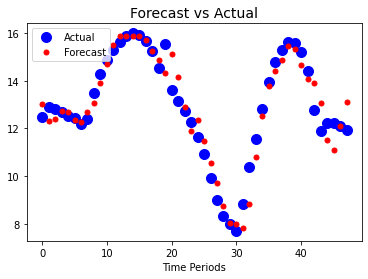

In [64]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(Y_test)), "bo", markersize=10, label="Actual")
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=10, label="Forecast")
plt.legend(loc="upper left")
plt.xlabel("Time Periods")
plt.show()

In [65]:
with tf1.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "models/weather.ckpt")
    predict=sess.run(outputs, feed_dict={X: X_test})
print(predict)

INFO:tensorflow:Restoring parameters from models/weather.ckpt
[[[13.0233755]
  [12.3073845]
  [12.411759 ]
  [12.733672 ]
  [12.69532  ]
  [12.350877 ]
  [12.269421 ]
  [12.693901 ]
  [13.056345 ]
  [13.889959 ]
  [14.683868 ]
  [15.508817 ]
  [15.893273 ]
  [15.892927 ]
  [15.857284 ]
  [15.869269 ]
  [15.686709 ]
  [15.235487 ]
  [14.856955 ]
  [14.3308525]
  [15.123223 ]
  [14.142193 ]
  [12.895844 ]
  [11.911701 ]]

 [[12.352992 ]
  [11.46684  ]
  [10.557922 ]
  [ 9.733211 ]
  [ 8.765846 ]
  [ 8.023695 ]
  [ 7.9934444]
  [ 7.8225484]
  [ 8.829331 ]
  [10.8028965]
  [12.524504 ]
  [13.77103  ]
  [14.403818 ]
  [14.850212 ]
  [15.438122 ]
  [15.340035 ]
  [14.659679 ]
  [14.080614 ]
  [13.916762 ]
  [13.05402  ]
  [11.511199 ]
  [11.092395 ]
  [12.123161 ]
  [13.107124 ]]]


In [66]:
print(y_pred)

[[[13.0233755]
  [12.3073845]
  [12.411759 ]
  [12.733672 ]
  [12.69532  ]
  [12.350877 ]
  [12.269421 ]
  [12.693901 ]
  [13.056345 ]
  [13.889959 ]
  [14.683868 ]
  [15.508817 ]
  [15.893273 ]
  [15.892927 ]
  [15.857284 ]
  [15.869269 ]
  [15.686709 ]
  [15.235487 ]
  [14.856955 ]
  [14.3308525]
  [15.123223 ]
  [14.142193 ]
  [12.895844 ]
  [11.911701 ]]

 [[12.352992 ]
  [11.46684  ]
  [10.557922 ]
  [ 9.733211 ]
  [ 8.765846 ]
  [ 8.023695 ]
  [ 7.9934444]
  [ 7.8225484]
  [ 8.829331 ]
  [10.8028965]
  [12.524504 ]
  [13.77103  ]
  [14.403818 ]
  [14.850212 ]
  [15.438122 ]
  [15.340035 ]
  [14.659679 ]
  [14.080614 ]
  [13.916762 ]
  [13.05402  ]
  [11.511199 ]
  [11.092395 ]
  [12.123161 ]
  [13.107124 ]]]
